# Linear Regression

Let's go through a quick linear regression example on some toy 2D data. Before we do that, however, let's go over a few things.


## What is Linear Regression?
It is an approach for modeling data. That is, we assume a linear relationship between our input and outputs, specifically, of the form,

$$ y = WX + b $$

where $X$ is the input, $y$ is the outputs, $W$ is a set of weights and $b$ is a set of biases.


## ....English Plz...
Imagine that our input data looks like the following:

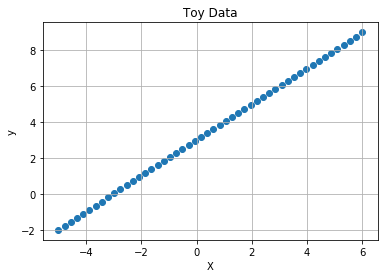

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

W = 1.
b = 3.
X = np.linspace(-5, 6, 50)
y = W * X + b 

plt.scatter(X, y)
plt.title('Toy Data')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

Looking at this data, we would think that a straight line would fit this data nicely. In fact, a straight line could fit this data perfectly! Real world data, however, is never this clean; normally, we would have some noise in our data:

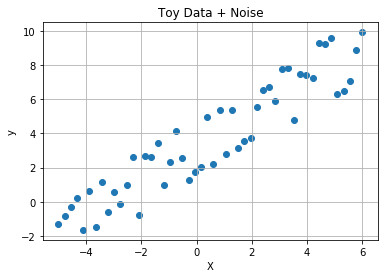

In [71]:
W = 1.
b = 3.
noise = np.random.uniform(-2, 2, size=X.shape)
X = np.linspace(-5, 6, 50)
y = W * X + b + noise

plt.scatter(X, y)
plt.title('Toy Data + Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

Looking at this data, we would still think that a line would fit this data pretty nicely but, now we don't expect a perfect fit i.e. we don't expect to find some $W$ and $b$ such that we get a straight line that hits every point in that plot. Instead, we try to find a straight line that best fits the data i.e. minimizes the error between it's predictions and the actual data.


## So how do we find the weights and biases for our Linear Regression Model?
Using Stochastic Gradient Descent! Let's do this in PyTorch:

In [72]:
import torch
from torch.autograd import Variable

# Convert our Numpy arrays to Torch Variables
X = Variable(torch.from_numpy(X)).float()
y = Variable(torch.from_numpy(y)).float()

# Initialize our Weights and Biases i.e. make an intial guess
W = Variable(torch.Tensor([-1]), requires_grad=True)
b = Variable(torch.Tensor([-2]), requires_grad=True)

Before we move on, let's visualize our Toy Data + Noise again but this time with our current linear model (based off our initial guess for $W$ and $b$):

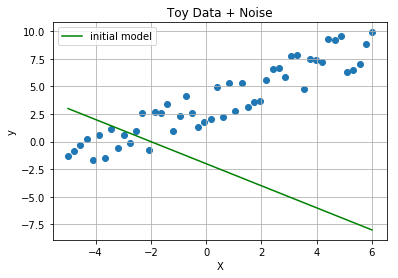

In [73]:
plt.scatter(X.data.numpy(), y.data.numpy())
predictions = W * X + b
plt.plot(X.data.numpy(), predictions.data.numpy(), color='g', label='initial model')
plt.title('Toy Data + Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Clearly, our initial model does not fit the data well. Let's see how much that improves with SGD.

In [74]:
import torch.nn as nn
import torch.optim as optim

error_fxn = nn.MSELoss()
learning_rate = 1e-2
optimizer = optim.SGD([W, b], lr=learning_rate)

losses = []

num_iterations = 1000
for iteration in xrange(num_iterations):
    predictions = W * X + b
    loss = error_fxn(predictions, y)
    losses.append(loss.data[0])
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Let's visualize our results:

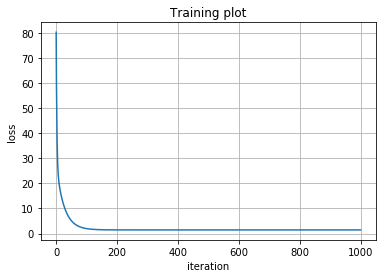

In [76]:
plt.plot(losses)
plt.title('Training plot')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

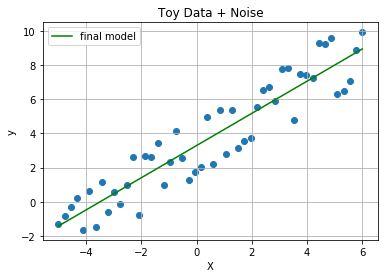

In [78]:
plt.scatter(X.data.numpy(), y.data.numpy())
predictions = W * X + b
plt.plot(X.data.numpy(), predictions.data.numpy(), color='g', label='final model')
plt.title('Toy Data + Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Looks pretty solid!